1. Mengumpulkan data

    Data dapat dikumpul dari berbagai macam sumber.
    Dalam kasus ini sumber didapatkan dari https://archive.ics.uci.edu/dataset/45/heart+disease kemudian data yang digunakan adalah hungarian.data

2. Menelaah data

    Data yang sudah dipilih tersebut akan ditelaah.
    Gunakan library yang dibuthukan untuk menelaah

In [66]:
import pandas as pd
import re
import numpy as np
import itertools

#Membaca data "hungarian.data"

In [67]:
dir = 'hungarian.data'

#Dalam data tersebut mempunyai pola disetiap 10 lines

In [68]:
with open(dir, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

#Data tersebut akan diiterasi sesuai jumlah kolom dan baris yang ada pada data set tersebut

In [69]:
data = itertools.takewhile(
lambda x: len(x) == 76,
(' '.join(lines[i:(i + 10)]).split() for i in range(0, len(lines), 10))
)

In [70]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


#Menampilkan informasi dari file dataset

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

#Pada kondisi dataset yang kita miliki terdapat kondisi khusus yang dimana sebelum memasuki tahap validasi data untuk tipe data object atau
string perlu dilakukan penghapusan fitur dikarenakan pada dataset ini nilai null disimbolkan dengan angka -9.0

In [72]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)

#mengubah tipe data file dataset menjadi tipe data float sesuai dengan nilai null yaitu -9.0

In [73]:
df = df.astype(float)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

3. Validasi Data

#Tahap ini bertujuan untuk mengetahui dan memahami isi dataset
#Agar mudah untuk menangani kondisinya, ubah nilai -9.0 menjadi null

In [75]:
df.replace(-9.0, np.nan, inplace=True)

In [76]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

In [77]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23

4. Menentukan object data

    Pilih 14 fitur yang akan digunakan sesuai dengan deskripsi dataset

In [79]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

In [80]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [81]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


#Ganti nama 14 fitur tersebut sesuai dengan deskripsi

In [82]:
column_mapping = {
2: 'age',
3: 'sex',
8: 'cp',
9: 'trestbps',
11: 'chol',
15: 'fbs',
18: 'restecg',
31: 'thalach',
37: 'exang',
39: 'oldpeak',
40: 'slope',
43: 'ca',
50: 'thal',
57: 'target'
}

In [83]:
df_selected.rename(columns=column_mapping, inplace=True)

/var/folders/7r/brf3gwy100d423nr9bf5ctw00000gn/T/ipykernel_28543/3799284956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [84]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [85]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
Name: count, dtype: int64

5. Membersihkan Data

In [86]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

#Berdasarkan output kode program diatas ada beberapa fitur yang hampir 90% datanya memiliki nilai null sehingga perlu dilakukan
penghapusan fitur menggunakan fungsi drop

In [87]:
columns_to_drop = ['slope', 'ca', 'thal']
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [88]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

#Meskipun sudah di drop namun masih ada beberapa yang memiliki null makan dapat menggunakan nilai mean untuk mengisi kolom tersebut

In [89]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

#Mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [90]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [91]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [92]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

#Melalukan pengecekan terhadap duplikaksi data

In [93]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


In [94]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


#Menghapus data yang memiliki duplikat

In [95]:
dfClean['target'].value_counts()

target
0.0    188
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

#Mencari korelasi antar fitur

In [97]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.013618,0.145826,0.245205,0.087099,0.180962,0.050407,-0.459420,0.238698,0.177707,0.209943
sex,0.013618,1.000000,0.249875,0.088580,0.027559,0.045663,-0.105503,-0.111248,0.157761,0.118931,0.223137
cp,0.145826,0.249875,1.000000,0.085396,0.134450,0.032810,-0.014687,-0.369762,0.495723,0.353109,0.428710
trestbps,0.245205,0.088580,0.085396,1.000000,0.080581,0.097124,0.013299,-0.184962,0.213645,0.206114,0.216957
chol,0.087099,0.027559,0.134450,0.080581,1.000000,0.107671,0.048059,-0.121867,0.160931,0.106662,0.255842
fbs,0.180962,0.045663,0.032810,0.097124,0.107671,1.000000,0.048400,-0.070438,0.116010,0.063722,0.154783
restecg,0.050407,-0.105503,-0.014687,0.013299,0.048059,0.048400,1.000000,0.004638,0.042309,0.043192,0.043634
thalach,-0.459420,-0.111248,-0.369762,-0.184962,-0.121867,-0.070438,0.004638,1.000000,-0.401669,-0.301798,-0.368716
exang,0.238698,0.157761,0.495723,0.213645,0.160931,0.116010,0.042309,-0.401669,1.000000,0.625510,0.572328
oldpeak,0.177707,0.118931,0.353109,0.206114,0.106662,0.063722,0.043192,-0.301798,0.625510,1.000000,0.581325


<Axes: >

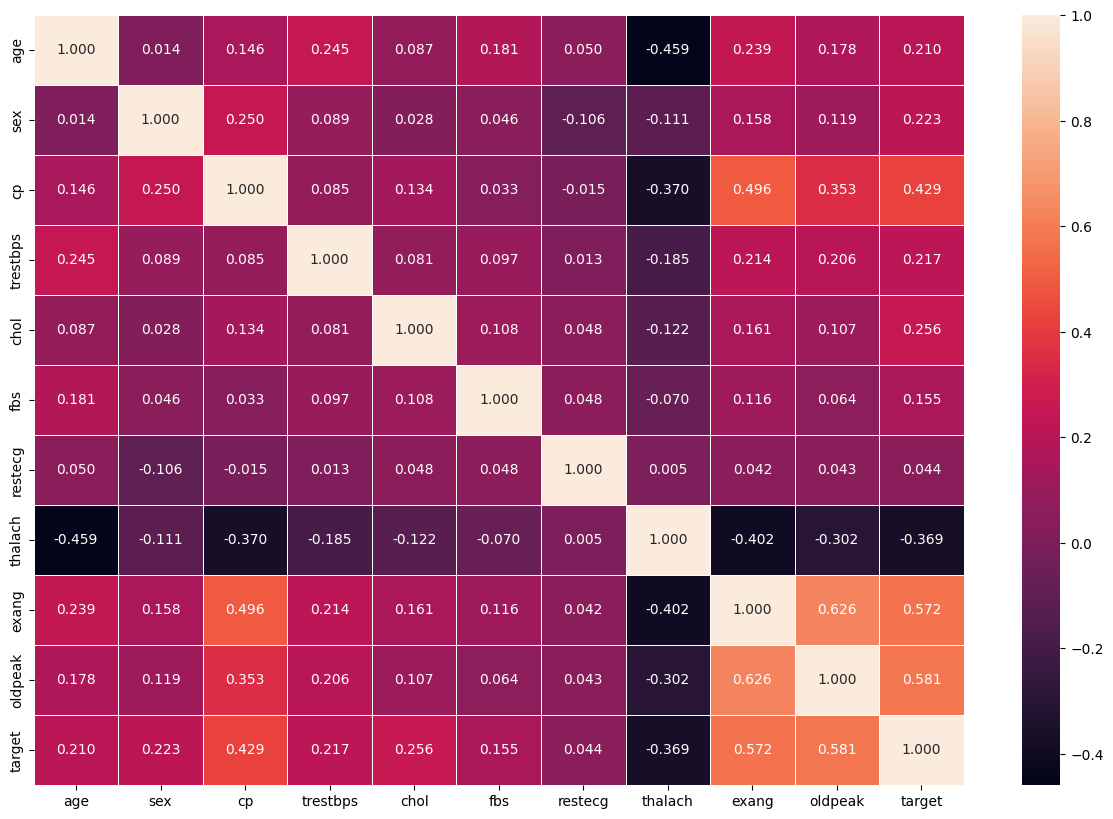

In [98]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

6. Konstruksi Data

    Dalam tahap ini Konstruksi data salah satu tujuannya yaitu untuk menyesuaikan semua tipe data yang ada di dalam dataset. Namun pada
    tahap ini dataset sudah memiliki tipe data yang sesuai sehingga tidak perlu dilakukan penyesuaian kembali

In [99]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [100]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


#Pisahkan fitur dan target menggunakan variable

In [101]:
X = dfClean.drop("target",axis=1).values 
y = dfClean.iloc[:,-1]

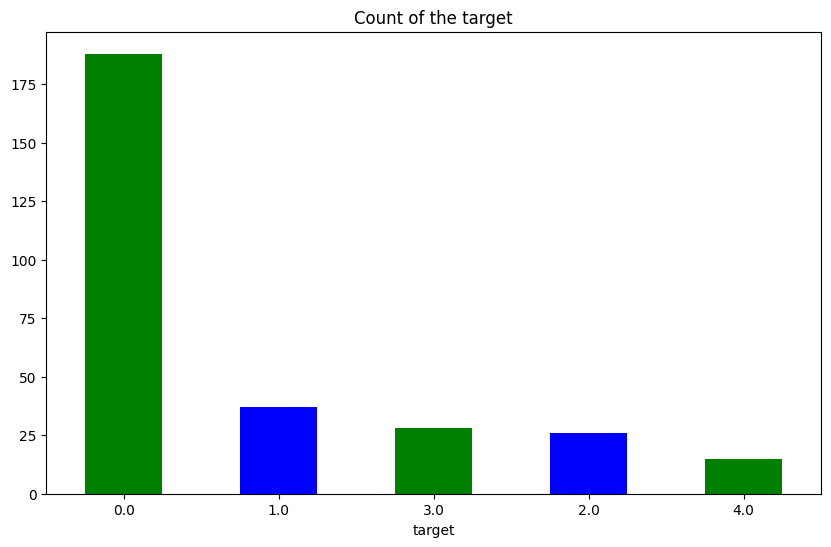

In [102]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue']) 
plt.title("Count of the target") 
plt.xticks(rotation=0);

#Grafik tersebut menunjukkan persebaran yang tidak seimbang

#Menyeimbangkan target ada 2 cara yaitu oversampling dan undersampling

#Salah satu metode yang Oversampling yang akan kita gunakan ada SMOTE

In [103]:
from imblearn.over_sampling import SMOTE 

In [104]:
smote = SMOTE(random_state=42) 
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

In [105]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

In [106]:
new_df1 = pd.DataFrame(data=y)

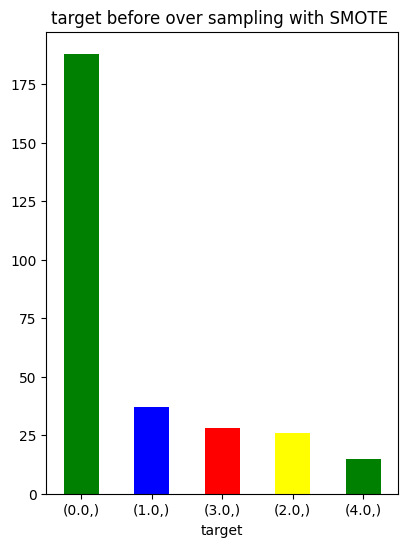

In [107]:
plt.subplot(1, 2, 1) 
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow']) 
plt.title("target before over sampling with SMOTE ") 
plt.xticks(rotation=0);

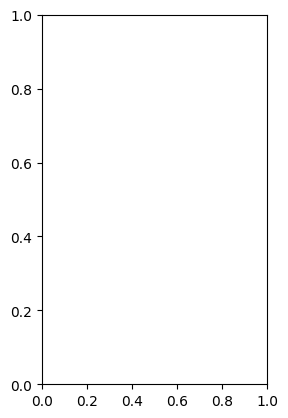

In [108]:
plt.subplot(1, 2, 2) 
new_df2 = pd.DataFrame(data=y_smote_resampled)

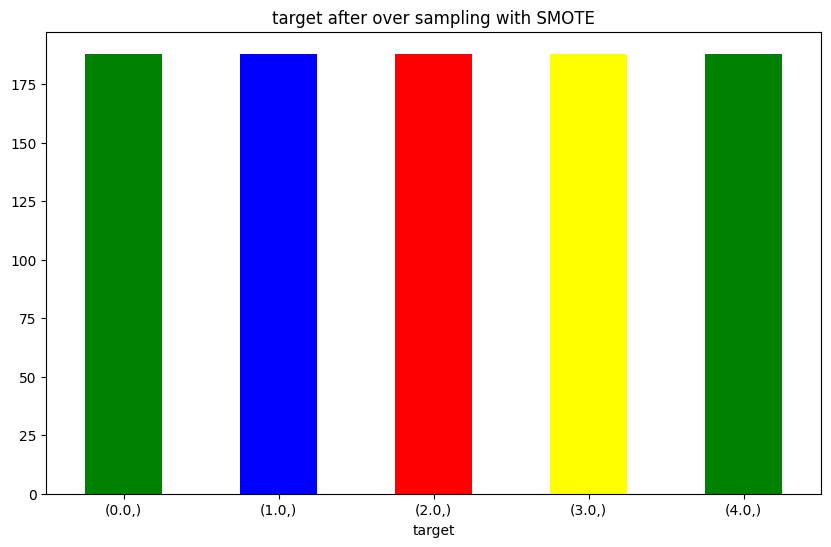

In [109]:
new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow']) 
plt.title("target after over sampling with SMOTE") 
plt.xticks(rotation=0);

#Pada Grafik diatas dapat dilihat ketika target belum di seimbangkan dan sudah diseimbangkan menggunakan oversampling.

In [110]:
plt.tight_layout() 
plt.show()

<Figure size 640x480 with 0 Axes>

In [111]:
new_df1 = pd.DataFrame(data=y)

In [112]:
new_df1.value_counts() 

target
0.0       188
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

In [113]:
new_df2 = pd.DataFrame(data=y_smote_resampled) 
new_df2.value_counts()

target
0.0       188
1.0       188
2.0       188
3.0       188
4.0       188
Name: count, dtype: int64

#Seimbangkan persebaran jumlah target kita dengan pengecekan apakah perlu dilakukan normalisasi/standarisasi

In [114]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.585034,250.860544,0.068027,0.217687,139.129252,0.302721,0.586054,0.792517
std,7.811812,0.447533,0.965117,17.596479,64.947952,0.252222,0.460257,23.549461,0.460219,0.908648,1.237006
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.250000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.500000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


#Deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki.

In [115]:
from sklearn.preprocessing import MinMaxScaler 

In [116]:
scaler = MinMaxScaler() 

In [117]:
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled) 
len(X_smote_resampled_normal) 

940

In [118]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal) 
dfcek1.describe() 

,0,1,2,3,4,5,6,7,8,9
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,0.564913,0.840057,0.814739,0.401580,0.340267,0.098229,0.119071,0.455022,0.588635,0.222449
std,0.173924,0.334249,0.278686,0.146359,0.112628,0.257297,0.198206,0.198376,0.451245,0.199095
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473684,1.000000,0.666667,0.296296,0.266409,0.000000,0.000000,0.311610,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.385762,0.329164,0.000000,0.000000,0.444444,0.891026,0.200000
75%,0.683815,1.000000,1.000000,0.489005,0.393266,0.000000,0.207721,0.592593,1.000000,0.386019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.


In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [121]:
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

7. Modeling

    Pada tahap ini kita akan memulai untuk membangun sebuah model.

In [122]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score

#Fungsi untuk menampilkan hasil akurasi dan rata - rata dari recall , f1 dan precision score setiap model.

#Fungsi akan dipanggil pada setiap model

#Membuat Fungsi bersifat opsional

In [123]:
def evaluation(Y_test, Y_pred):
    acc = accuracy_score(Y_test, Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
                'recall': round(rcl,3),
                'F1 score': round(f1,3),
                'Precision score': round(ps,3)
                }
    return print(metric_dict)

#KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report 
knn_model = KNeighborsClassifier(n_neighbors = 3) 
knn_model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [190]:
import pickle

with open("modelKNN.pkl", "wb") as file:
    pickle.dump(knn_model, file)

In [125]:
y_pred_knn = knn_model.predict(X_test)

In [126]:
print("K-Nearest Neighbors (KNN) Model:") 
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote) 
print("Classification Report:") 
print(classification_report(y_test, y_pred_knn)) 

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.734
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.45      0.52        38
         1.0       0.74      0.76      0.75        37
         2.0       0.72      0.82      0.77        38
         3.0       0.76      0.76      0.76        38
         4.0       0.79      0.89      0.84        37

    accuracy                           0.73       188
   macro avg       0.73      0.73      0.73       188
weighted avg       0.73      0.73      0.73       188



In [127]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.734, 'recall': 0.734, 'F1 score': 0.726, 'Precision score': 0.727}


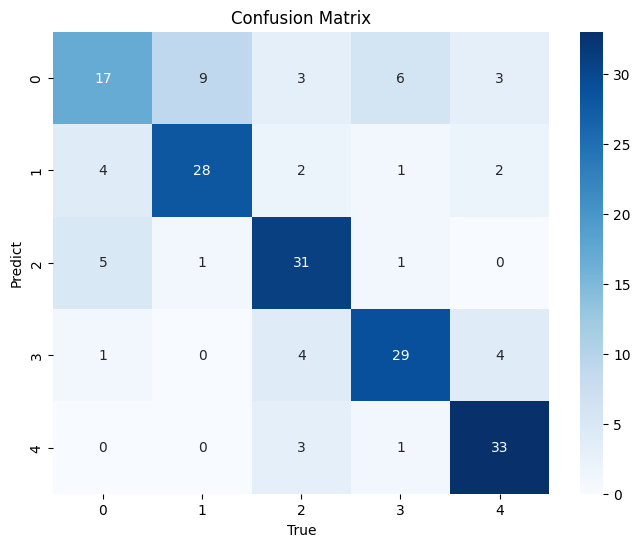

In [128]:
cm = confusion_matrix(y_test, y_pred_knn) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#Random Forest

In [129]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=42)

In [130]:
y_pred_rf = rf_model.predict(X_test)

In [131]:
print("\nRandom Forest Model:") 
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote) 
print("Classification Report:") 
print(classification_report(y_test, y_pred_rf)) 


Random Forest Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.79      0.92      0.85        37
         2.0       0.86      0.79      0.82        38
         3.0       0.97      0.87      0.92        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188



In [132]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.888, 'Precision score': 0.892}


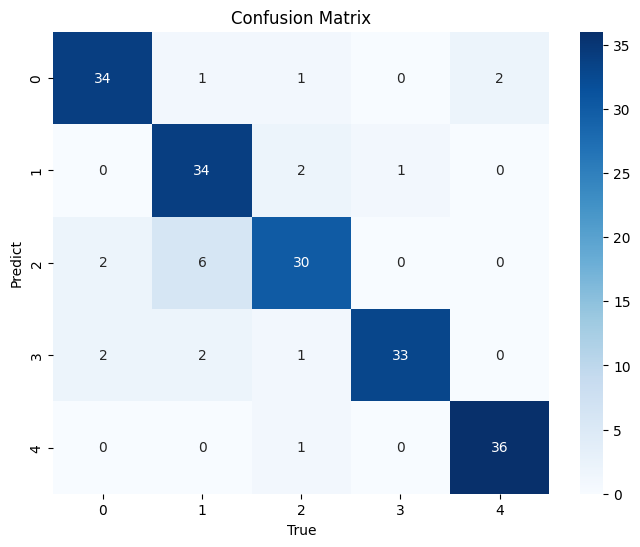

In [133]:
cm = confusion_matrix(y_test, y_pred_rf) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#XGBOOST

In [134]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42) 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [135]:
import pickle 

with open("modelXGB.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

In [136]:
y_pred_xgb = xgb_model.predict(X_test)

In [137]:
print("\nXGBoost Model:") 
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote) 
print("Classification Report:") 
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.85      0.92      0.88        37
         2.0       0.87      0.87      0.87        38
         3.0       1.00      0.89      0.94        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188



In [138]:
evaluation(y_test,y_pred_xgb)

{'accuracy': 0.91, 'recall': 0.91, 'F1 score': 0.91, 'Precision score': 0.912}


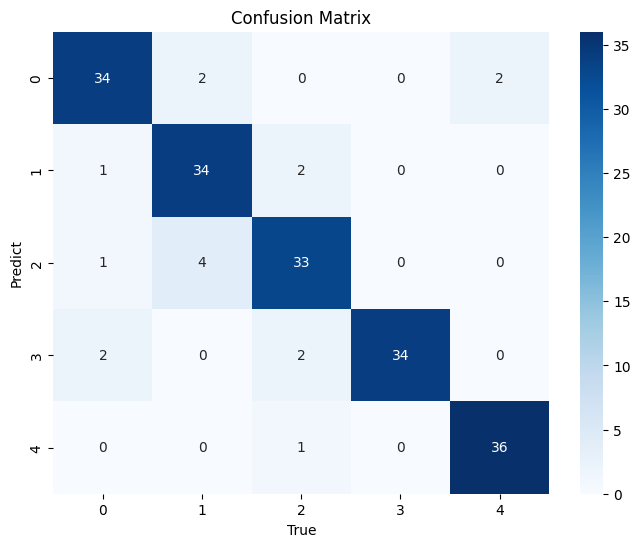

In [139]:
cm = confusion_matrix(y_test, y_pred_xgb) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#KNN Oversample + Normalisasi

In [140]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report 
knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train_normal, y_train_normal) 

KNeighborsClassifier(n_neighbors=3)

In [141]:
y_pred_knn = knn_model.predict(X_test_normal)

In [142]:
print("K-Nearest Neighbors (KNN) Model:") 
accuracy_knn_smote_normal = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.856
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.76      0.84        38
         1.0       0.79      0.89      0.84        37
         2.0       0.81      0.79      0.80        38
         3.0       0.86      0.84      0.85        38
         4.0       0.90      1.00      0.95        37

    accuracy                           0.86       188
   macro avg       0.86      0.86      0.86       188
weighted avg       0.86      0.86      0.86       188



In [143]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.856, 'recall': 0.856, 'F1 score': 0.855, 'Precision score': 0.86}


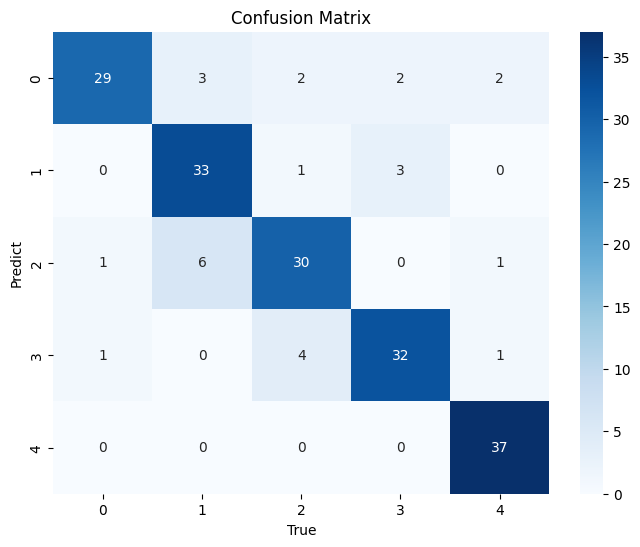

In [144]:
cm = confusion_matrix(y_test_normal, y_pred_knn) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#Random Forest Oversample + Normalisasi

In [145]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_train_normal, y_train_normal)

RandomForestClassifier(random_state=42)

In [146]:
y_pred_rf = rf_model.predict(X_test_normal) 

In [147]:
print("\nRandom Forest Model:") 
accuracy_rf_smote_normal = round(accuracy_score(y_test_normal, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote_normal ) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_rf)) 


Random Forest Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.79      0.92      0.85        37
         2.0       0.86      0.79      0.82        38
         3.0       0.97      0.87      0.92        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188



In [148]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.888, 'Precision score': 0.892}


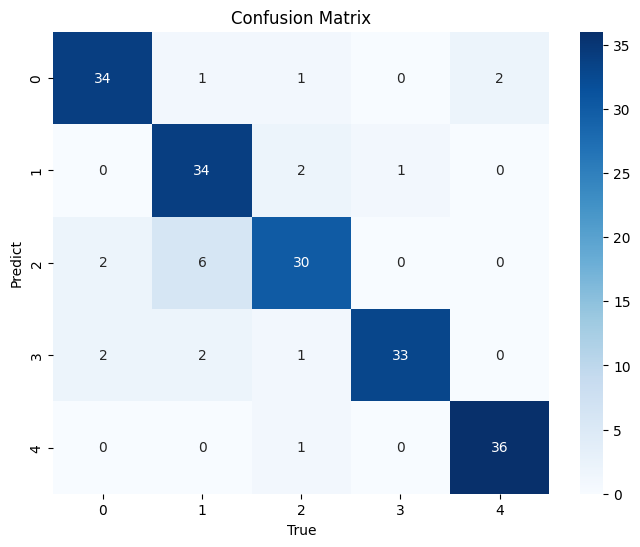

In [149]:
cm = confusion_matrix(y_test_normal, y_pred_rf) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#XGBOOST Oversample + Normalisasi

In [150]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train_normal, y_train_normal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [151]:
y_pred_xgb = xgb_model.predict(X_test_normal) 

In [152]:
print("\nXGBoost Model:") 
accuracy_xgb_smote_normal = round(accuracy_score(y_test_normal, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote_normal) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_xgb)) 


XGBoost Model:
Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.85      0.92      0.88        37
         2.0       0.87      0.87      0.87        38
         3.0       1.00      0.89      0.94        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188



In [153]:
evaluation(y_test_normal,y_pred_xgb) 


{'accuracy': 0.91, 'recall': 0.91, 'F1 score': 0.91, 'Precision score': 0.912}


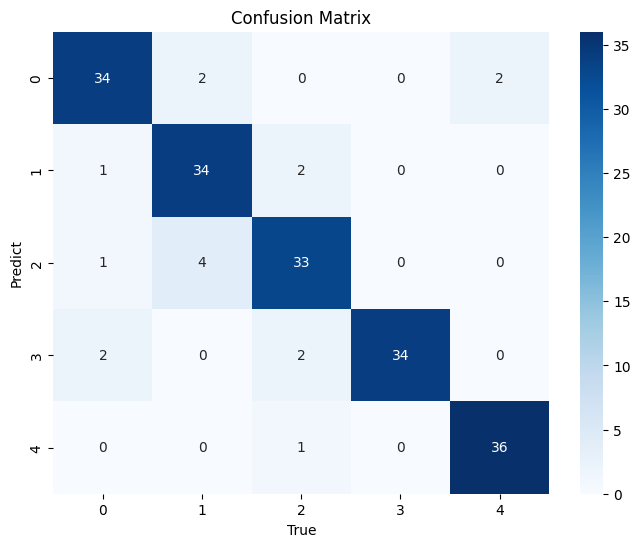

In [154]:
cm = confusion_matrix(y_test_normal, y_pred_xgb) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show() 

#KNN Tunning + Normalisasi + Oversample

In [155]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.model_selection import RandomizedSearchCV

In [156]:
knn_model = KNeighborsClassifier() 

In [157]:
param_grid = { 
"n_neighbors": range(3, 21), 
"metric": ["euclidean", "manhattan", "chebyshev"], 
"weights": ["uniform", "distance"], 
"algorithm": ["auto", "ball_tree", "kd_tree"], 
"leaf_size": range(10, 61), 
} 

In [158]:
knn_model = RandomizedSearchCV(estimator=knn_model, param_distributions=param_grid, n_iter=100, scoring="accuracy", cv=5) 

In [159]:
knn_model.fit(X_train_normal, y_train_normal) 

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree'],
                                        'leaf_size': range(10, 61),
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(3, 21),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [160]:
best_params = knn_model.best_params_ 
print(f"Best parameters: {best_params}") 

Best parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan', 'leaf_size': 24, 'algorithm': 'ball_tree'}


In [161]:
y_pred_knn = knn_model.predict(X_test_normal)

In [162]:
print("K-Nearest Neighbors (KNN) Model:") 
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn),3) 
print("Accuracy:", accuracy_knn_smote_normal_Tun) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_knn)) 

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.867
Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.71      0.82        38
         1.0       0.72      0.92      0.81        37
         2.0       0.84      0.84      0.84        38
         3.0       0.94      0.87      0.90        38
         4.0       0.93      1.00      0.96        37

    accuracy                           0.87       188
   macro avg       0.88      0.87      0.87       188
weighted avg       0.88      0.87      0.87       188



In [163]:
evaluation(y_test_normal,y_pred_knn)

{'accuracy': 0.867, 'recall': 0.867, 'F1 score': 0.867, 'Precision score': 0.88}


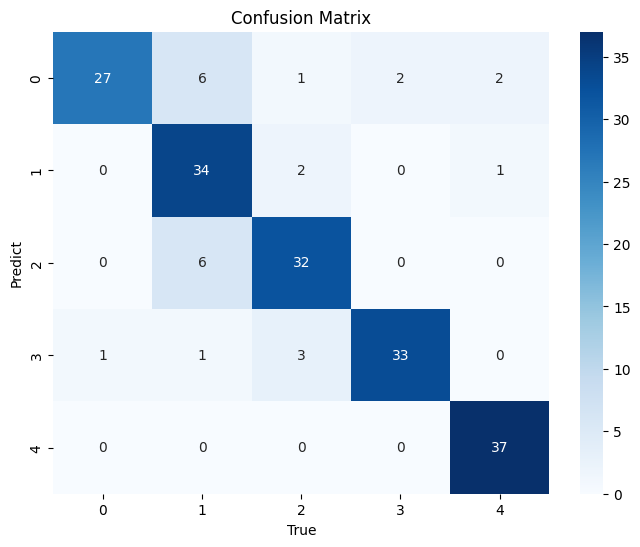

In [164]:
cm = confusion_matrix(y_test_normal, y_pred_knn) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show() 

#Random Forest Tunning + Normalisasi + Oversample

In [165]:
rf_model = RandomForestClassifier() 

In [166]:
param_grid = { 
"n_estimators": [100, 200], 
"max_depth": [ 10, 15], 
"min_samples_leaf": [1, 2], 
"min_samples_split": [2, 5], 
"max_features": ["sqrt", "log2"], 
# "random_state": [42, 100, 200] 
} 

In [167]:
rf_model = RandomizedSearchCV(rf_model, param_grid, n_iter=100, cv=5, n_jobs=-1)

In [168]:
rf_model.fit(X_train_normal, y_train_normal)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200]})

In [169]:
y_pred_rf = rf_model.predict(X_test_normal)

In [170]:
print("\nRandom Forest Model:") 
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf),3) 
print("Accuracy:",accuracy_rf_smote_normal_Tun) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_rf)) 


Random Forest Model:
Accuracy: 0.888
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.79      0.92      0.85        37
         2.0       0.86      0.79      0.82        38
         3.0       0.97      0.87      0.92        38
         4.0       0.95      0.97      0.96        37

    accuracy                           0.89       188
   macro avg       0.89      0.89      0.89       188
weighted avg       0.89      0.89      0.89       188



In [171]:
evaluation(y_test_normal,y_pred_rf)

{'accuracy': 0.888, 'recall': 0.888, 'F1 score': 0.888, 'Precision score': 0.892}


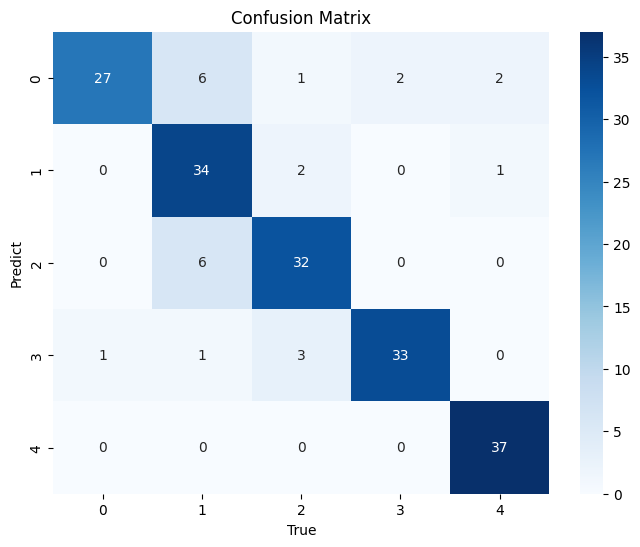

In [172]:
cm = confusion_matrix(y_test_normal, y_pred_knn) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show()

#XGBOOST Tunning + Normalisasi + Oversample

In [173]:
xgb_model = XGBClassifier()

In [174]:
param_grid = { 
"max_depth": [3, 5, 7], 
"learning_rate": [0.01, 0.1], 
"n_estimators": [100, 200], 
"gamma": [0, 0.1], 
"colsample_bytree": [0.7, 0.8], 
}

In [175]:
xgb_model = RandomizedSearchCV(xgb_model, param_grid, n_iter=10, cv=5, n_jobs=-1) 

In [176]:
xgb_model.fit(X_train_normal, y_train_normal) 
best_params = xgb_model.best_params_ 
print(f"Best parameters: {best_params}")

Best parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [177]:
y_pred_xgb = xgb_model.predict(X_test_normal)

In [178]:
print("\nXGBoost Model:") 
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb),3) 
print("Accuracy:",accuracy_xgb_smote_normal_Tun) 
print("Classification Report:") 
print(classification_report(y_test_normal, y_pred_xgb)) 


XGBoost Model:
Accuracy: 0.899
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91        38
         1.0       0.81      0.92      0.86        37
         2.0       0.84      0.82      0.83        38
         3.0       0.97      0.89      0.93        38
         4.0       0.97      0.97      0.97        37

    accuracy                           0.90       188
   macro avg       0.90      0.90      0.90       188
weighted avg       0.90      0.90      0.90       188



In [179]:
evaluation(y_test_normal,y_pred_xgb)

{'accuracy': 0.899, 'recall': 0.899, 'F1 score': 0.9, 'Precision score': 0.902}


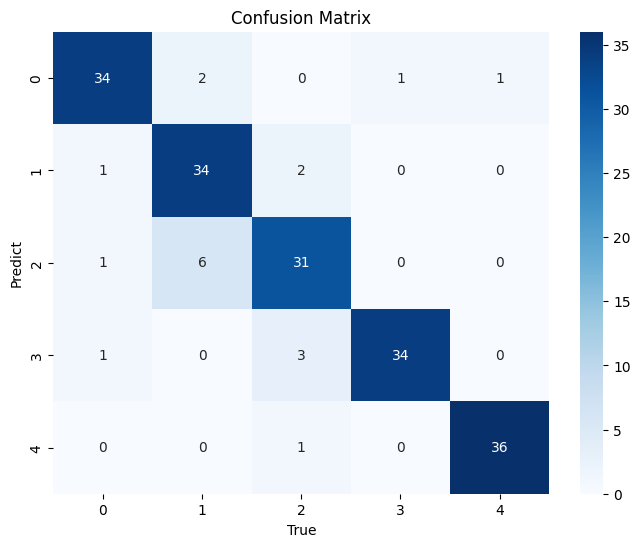

In [180]:
cm = confusion_matrix(y_test_normal, y_pred_xgb) 
plt.figure(figsize=(8, 6)) 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
plt.title('Confusion Matrix') 
plt.xlabel('True') 
plt.ylabel('Predict') 
plt.show() 

8. Evaluasi

    Lakukan evaluasi data sekaligus membandingkan antar algoritma guna dengan tujuan mengetahui jenis model algoritma yang menghasilkan hasil akurasi terbaik.

In [181]:
import matplotlib.pyplot as plt

In [182]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 
'XGBoost'], 'Accuracy': [accuracy_knn_smote*100, 
accuracy_rf_smote*100,accuracy_xgb_smote*100]}) 
model_comp1.head() 

,Model,Accuracy
0,K-Nearest Neighbour,73.4
1,Random Forest,88.8
2,XGBoost,91.0


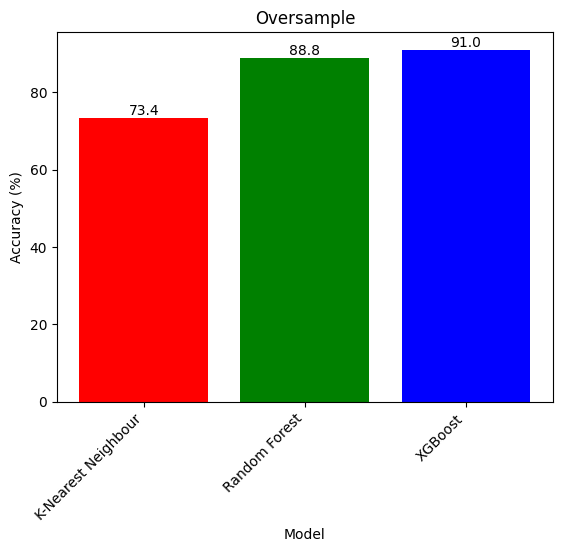

In [183]:
fig, ax = plt.subplots() 
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model') 
plt.ylabel('Accuracy (%)') 
plt.title('Oversample') 
plt.xticks(rotation=45, ha='right') 
for bar in bars: 
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show()

#Hasil Oversample

In [184]:
model_comp2 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal*100, 
accuracy_rf_smote_normal*100,accuracy_xgb_smote_normal*100]}) 
model_comp2.head() 

,Model,Accuracy
0,K-Nearest Neighbour,85.6
1,Random Forest,88.8
2,XGBoost,91.0


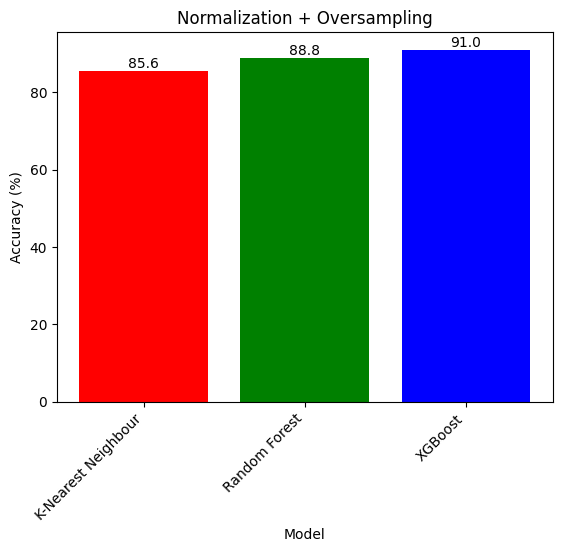

In [185]:
fig, ax = plt.subplots() 
bars = plt.bar(model_comp2['Model'], model_comp2['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model') 
plt.ylabel('Accuracy (%)') 
plt.title('Normalization + Oversampling') 
plt.xticks(rotation=45, ha='right')
for bar in bars: 
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

#Hasil Normalisasi + Oversample

In [186]:
model_comp3 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest', 'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100, 
accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]}) 
model_comp3.head()

,Model,Accuracy
0,K-Nearest Neighbour,86.7
1,Random Forest,88.8
2,XGBoost,89.9


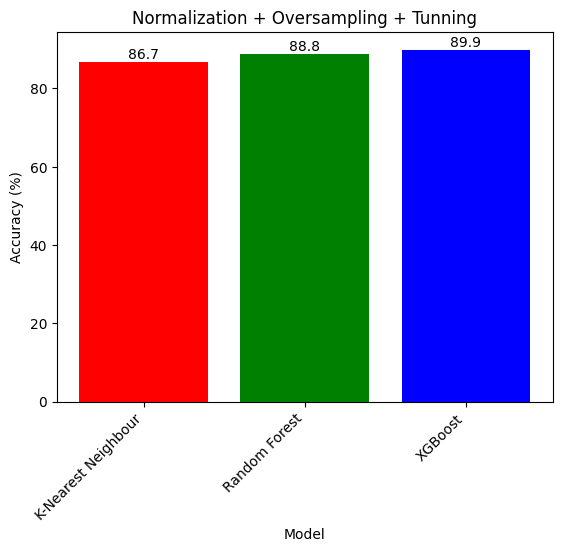

In [187]:
fig, ax = plt.subplots() 
bars = plt.bar(model_comp3['Model'], model_comp3['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model') 
plt.ylabel('Accuracy (%)') 
plt.title('Normalization + Oversampling + Tunning') 
plt.xticks(rotation=45, ha='right') 
for bar in bars: 
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
plt.show()

#Hasil Normalisasi + Oversample + Tunning

In [188]:
model_compBest = pd.DataFrame({ 
'Model': ['K-Nearest Neighbour OverSample Tunning', 'Random Forest OverSample', 
'XGB OverSample Standarization Tunning'], 
'Accuracy': [accuracy_knn_smote_normal_Tun*100, accuracy_rf_smote_normal*100, 
accuracy_xgb_smote_normal_Tun*100] 
}) 

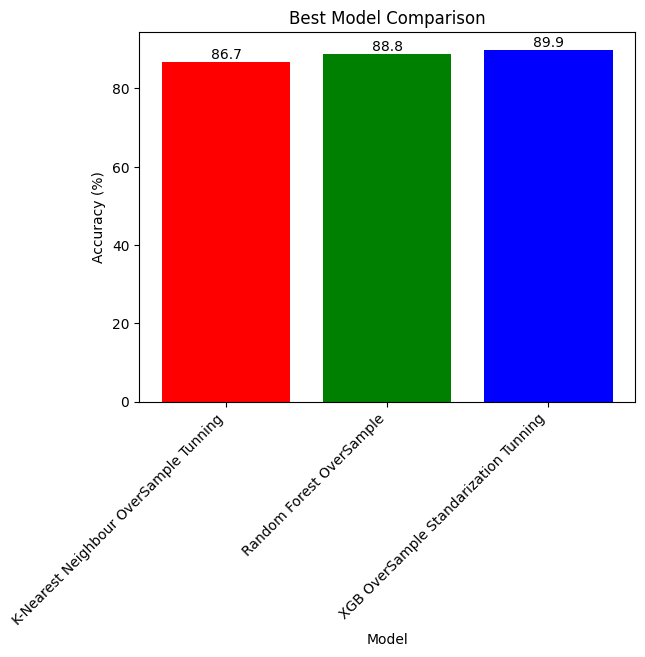

In [189]:
fig, ax = plt.subplots() 
bars = plt.bar(model_compBest['Model'], model_compBest['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model') 
plt.ylabel('Accuracy (%)') 
plt.title('Best Model Comparison') 
plt.xticks(rotation=45, ha='right')
for bar in bars: 
    yval = bar.get_height() 
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom') 
plt.show() 